In [36]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
from scipy.interpolate import griddata
import optuna
import seaborn as sns
import numpy as np
from optuna.visualization.matplotlib import plot_contour, plot_edf, plot_intermediate_values, plot_optimization_history, plot_parallel_coordinate, plot_param_importances, plot_slice, plot_pareto_front


In [5]:
# connect to the optuna database
study = optuna.load_study(study_name="OPTICALFLOW", storage="sqlite:///bbdd prova3.db")

df = study.trials_dataframe()
df.to_csv("opticalFlow.csv")



In [6]:
# get the keys of the target parameters
study.best_trials 

[FrozenTrial(number=14, state=1, values=[2.7109634637094566, 13.165915843956677], datetime_start=datetime.datetime(2023, 4, 11, 9, 35, 8, 842316), datetime_complete=datetime.datetime(2023, 4, 11, 10, 53, 39, 483796), params={'valid_combination': "{'block_size': 16, 'search_area': 32, 'step_size': 8, 'distance_type': 'NCC'}"}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'valid_combination': CategoricalDistribution(choices=("{'block_size': 2, 'search_area': 2, 'step_size': 1, 'distance_type': 'NCC'}", "{'block_size': 2, 'search_area': 2, 'step_size': 1, 'distance_type': 'SAD'}", "{'block_size': 2, 'search_area': 2, 'step_size': 1, 'distance_type': 'SSD'}", "{'block_size': 2, 'search_area': 2, 'step_size': 2, 'distance_type': 'NCC'}", "{'block_size': 2, 'search_area': 2, 'step_size': 2, 'distance_type': 'SAD'}", "{'block_size': 2, 'search_area': 2, 'step_size': 2, 'distance_type': 'SSD'}", "{'block_size': 2, 'search_area': 4, 'step_size': 1, 'distance_type': 'NC

In [7]:
#plot_param_importances(study, target=lambda t: t.values[0])
# get the study parameters


In [8]:
# filtrate df only with the ones that have state = complete
df = df[df['state'] == 'COMPLETE']

# remove the columns that are not parameters
df2 = df.drop(['number','datetime_start', 'datetime_complete','state'], axis=1)
df2


,values_0,values_1,duration,params_valid_combination
0,11.804420,87.242404,0 days 02:49:51.241116,"{'block_size': 2, 'search_area': 8, 'step_size..."
4,13.094950,95.631170,0 days 01:45:47.434432,"{'block_size': 8, 'search_area': 8, 'step_size..."
8,34.570537,80.397776,0 days 04:00:38.899380,"{'block_size': 4, 'search_area': 64, 'step_siz..."
9,6.698571,32.948337,0 days 01:50:25.202284,"{'block_size': 8, 'search_area': 16, 'step_siz..."
10,4.799655,22.933001,0 days 00:32:24.308793,"{'block_size': 16, 'search_area': 16, 'step_si..."
11,18.075785,73.405540,0 days 01:46:48.787211,"{'block_size': 4, 'search_area': 32, 'step_siz..."
12,3.674554,13.414167,0 days 01:03:42.130230,"{'block_size': 16, 'search_area': 64, 'step_si..."
14,2.710963,13.165916,0 days 01:18:30.641480,"{'block_size': 16, 'search_area': 32, 'step_si..."
15,12.542975,92.766223,0 days 01:42:28.256121,"{'block_size': 4, 'search_area': 8, 'step_size..."
17,29.942955,99.740247,0 days 01:37:41.577214,"{'block_size': 16, 'search_area': 32, 'step_si..."


In [9]:
# convert the column parameters_valid_combination to different columns: block_size (int), search_area (int), step_size (int), distance_type (str)
df2['block_size'] = df2['params_valid_combination'].apply(lambda x: int(x.split('block_size')[1].split(',')[0].split(' ')[1]))
df2['search_area'] = df2['params_valid_combination'].apply(lambda x: int(x.split('search_area')[1].split(',')[0].split(' ')[1]))
df2['step_size'] = df2['params_valid_combination'].apply(lambda x: int(x.split('step_size')[1].split(',')[0].split(' ')[1]))
df2['distance_type'] = df2['params_valid_combination'].apply(lambda x: x.split('distance_type')[1].split('}')[0].split(' ')[1].replace("'",''))

# remove the column parameters_valid_combination
df2 = df2.drop(['params_valid_combination'], axis=1)



In [10]:
# rename the col values_0 to MSEN and values_1 to PEPN
df2 = df2.rename(columns={'values_0': 'MSEN', 'values_1': 'PEPN'})
df2

,MSEN,PEPN,duration,block_size,search_area,step_size,distance_type
0,11.804420,87.242404,0 days 02:49:51.241116,2,8,2,SSD
4,13.094950,95.631170,0 days 01:45:47.434432,8,8,4,SAD
8,34.570537,80.397776,0 days 04:00:38.899380,4,64,2,NCC
9,6.698571,32.948337,0 days 01:50:25.202284,8,16,4,NCC
10,4.799655,22.933001,0 days 00:32:24.308793,16,16,16,NCC
11,18.075785,73.405540,0 days 01:46:48.787211,4,32,4,NCC
12,3.674554,13.414167,0 days 01:03:42.130230,16,64,8,NCC
14,2.710963,13.165916,0 days 01:18:30.641480,16,32,8,NCC
15,12.542975,92.766223,0 days 01:42:28.256121,4,8,4,SAD
17,29.942955,99.740247,0 days 01:37:41.577214,16,32,16,SAD


In [11]:
#Save CSV file
df2.to_csv("opticalFlow_filtered.csv")

In [12]:
#drop the time columns
df3 = df2.drop(['duration','PEPN'], axis=1)
#put the MSEN col as the last one
df3 = df3[['block_size','search_area','step_size','distance_type','MSEN']]

# remove the duplicates
df3 = df3.drop_duplicates()




In [13]:
#change the distance_type to int (0,1,2)
df3['distance_type'] = df3['distance_type'].replace({'SSD': 0, 'SAD': 50, 'NCC': 100})
df3

,block_size,search_area,step_size,distance_type,MSEN
0,2,8,2,0,11.804420
4,8,8,4,50,13.094950
8,4,64,2,100,34.570537
9,8,16,4,100,6.698571
10,16,16,16,100,4.799655
11,4,32,4,100,18.075785
12,16,64,8,100,3.674554
14,16,32,8,100,2.710963
15,4,8,4,50,12.542975
17,16,32,16,50,29.942955


In [14]:
# copy the MSEN column to a new one
df3['MSEN_value'] = df3['MSEN']
df3

,block_size,search_area,step_size,distance_type,MSEN,MSEN_value
0,2,8,2,0,11.804420,11.804420
4,8,8,4,50,13.094950,13.094950
8,4,64,2,100,34.570537,34.570537
9,8,16,4,100,6.698571,6.698571
10,16,16,16,100,4.799655,4.799655
11,4,32,4,100,18.075785,18.075785
12,16,64,8,100,3.674554,3.674554
14,16,32,8,100,2.710963,2.710963
15,4,8,4,50,12.542975,12.542975
17,16,32,16,50,29.942955,29.942955


2.7109634637094566 67.16782422566092


/tmp/ipykernel_3332502/2926359222.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


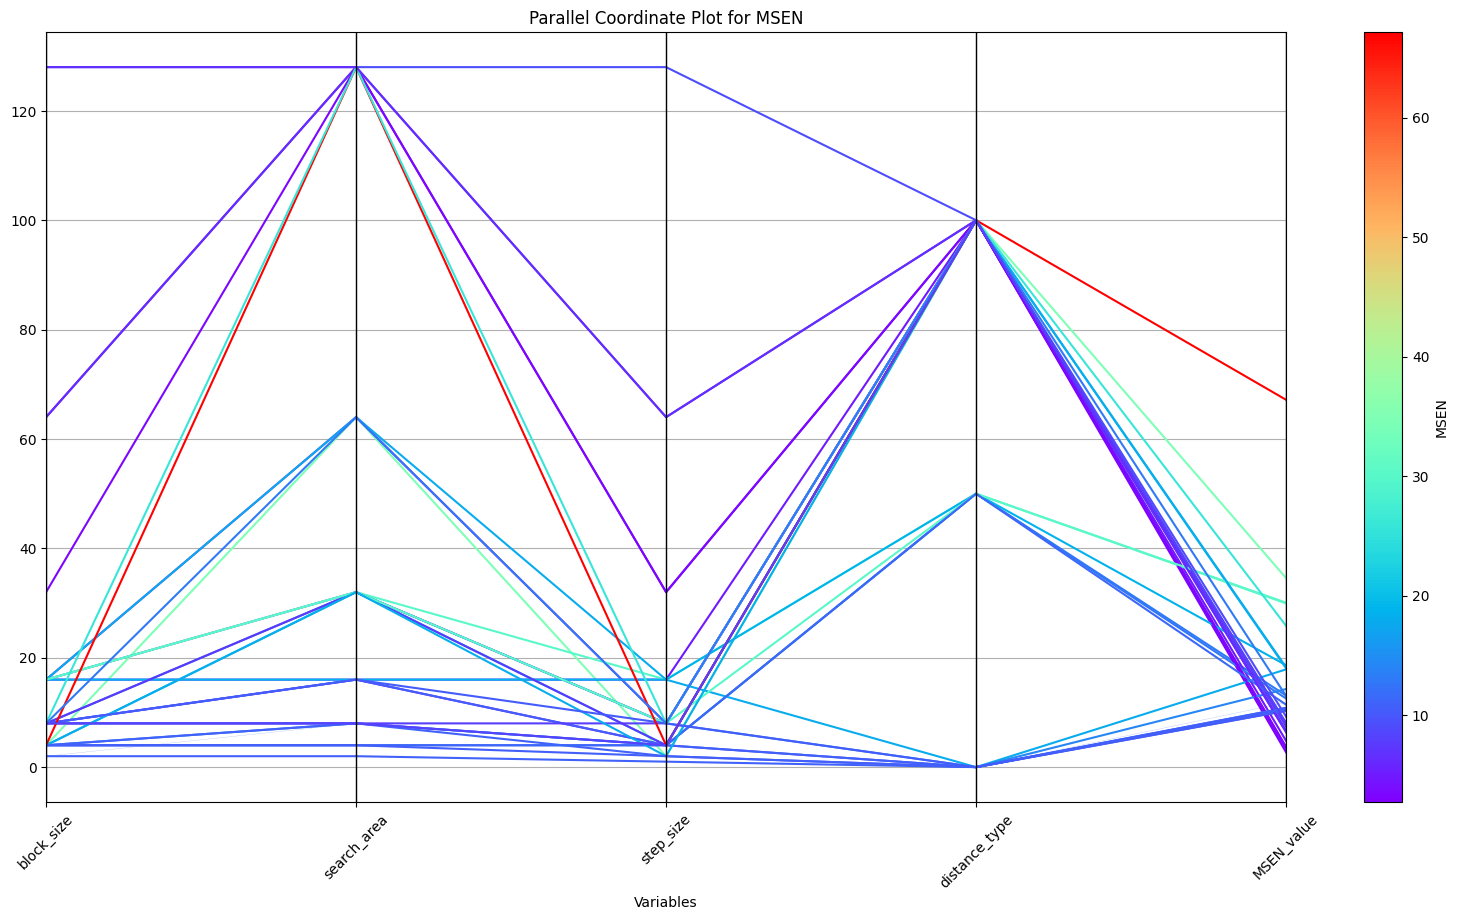

In [15]:
# for MSEN plot the parameters relationship
# Create a parallel coordinate plot

#Create a colormap
cmap = sns.color_palette("rainbow", as_cmap=True)

# the CMAP to be from the min to the max of the MSEN

vmin = df3['MSEN'].min()
vmax = df3['MSEN'].max()
print(vmin, vmax)

plt.figure(figsize=(20, 10))
pd.plotting.parallel_coordinates(df3, 'MSEN', color=cmap((df3['MSEN'] - vmin) / (vmax - vmin)), ax=plt.gca())
plt.xticks(rotation=45)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # Clear colorbar data
cbar = plt.colorbar(sm)
cbar.set_label('MSEN')

#set the lines thiner
plt.gca().lines[0].set_linewidth(0.1)
plt.legend().set_visible(False)
plt.ylabel('')
plt.xlabel('Variables')
plt.title('Parallel Coordinate Plot for MSEN')
plt.show()

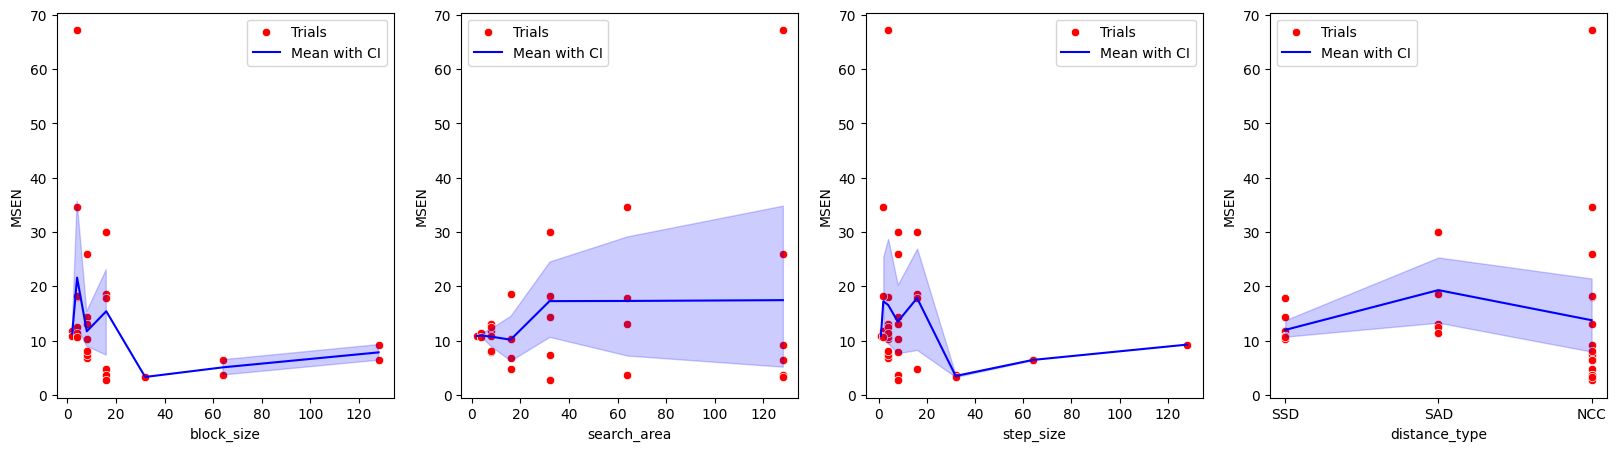

In [16]:
# plot for each parameter an individual plot with the MSEN: block_size, search_area, step_size, distance_type
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
sns.scatterplot(data=df3, x="block_size", y="MSEN", ax=axs[0], color = 'red', label = "Trials")
sns.scatterplot(data=df3, x="search_area", y="MSEN", ax=axs[1], color = 'red',  label = "Trials")
sns.scatterplot(data=df3, x="step_size", y="MSEN", ax=axs[2], color = 'red',  label = "Trials")
sns.scatterplot(data=df3, x="distance_type", y="MSEN", ax=axs[3], color = 'red', label = "Trials")

#change the distance_type x axis labels str (SSD: 0, SAD: 50 , NCC:100)
axs[3].set_xticks([0, 50, 100])
axs[3].set_xticklabels(['SSD', 'SAD', 'NCC'])



# add the mean line for each value of block_size, search_area, step_size
sns.lineplot(data=df3, x="block_size", y="MSEN_value", ax=axs[0], color='blue', label='Mean with CI')
sns.lineplot(data=df3, x="search_area", y="MSEN_value", ax=axs[1], color='blue', label='Mean with CI')
sns.lineplot(data=df3, x="step_size", y="MSEN_value", ax=axs[2], color='blue', label='Mean with CI')
sns.lineplot(data=df3, x="distance_type", y="MSEN_value", ax=axs[3], color='blue', label='Mean with CI')

# add legend for the mean lineplot
axs[0].legend()
axs[1].legend()
axs[2].legend()




plt.show()




In [17]:
# get which distance_type has the best MSEN
best_dist = df3[df3['MSEN'] == df3['MSEN'].min()]['distance_type'].values[0]

# get wich step_size has the best MSEN
best_step = df3[df3['MSEN'] == df3['MSEN'].min()]['step_size'].values[0]

#filer the df3 with the best distance_type
df4 = df3[df3['distance_type'] == best_dist]

#filer the df4 with the best step_size
df4 = df4[df4['step_size'] == best_step]

# convert distance type to string 
df4['distance_type'] = df4['distance_type'].replace({0: 'SSD', 50: 'SAD', 100: 'NCC'})
print ("best distance_type: ", best_dist)
print ("best step_size: ", best_step)

# remove distance_type column and step_size column
df4 = df4.drop(['distance_type', 'step_size', 'MSEN_value'], axis=1)

df4

best distance_type:  100
best step_size:  8


,block_size,search_area,MSEN
12,16,64,3.674554
14,16,32,2.710963
26,8,8,7.928887
61,8,128,25.838829
70,8,64,13.011252


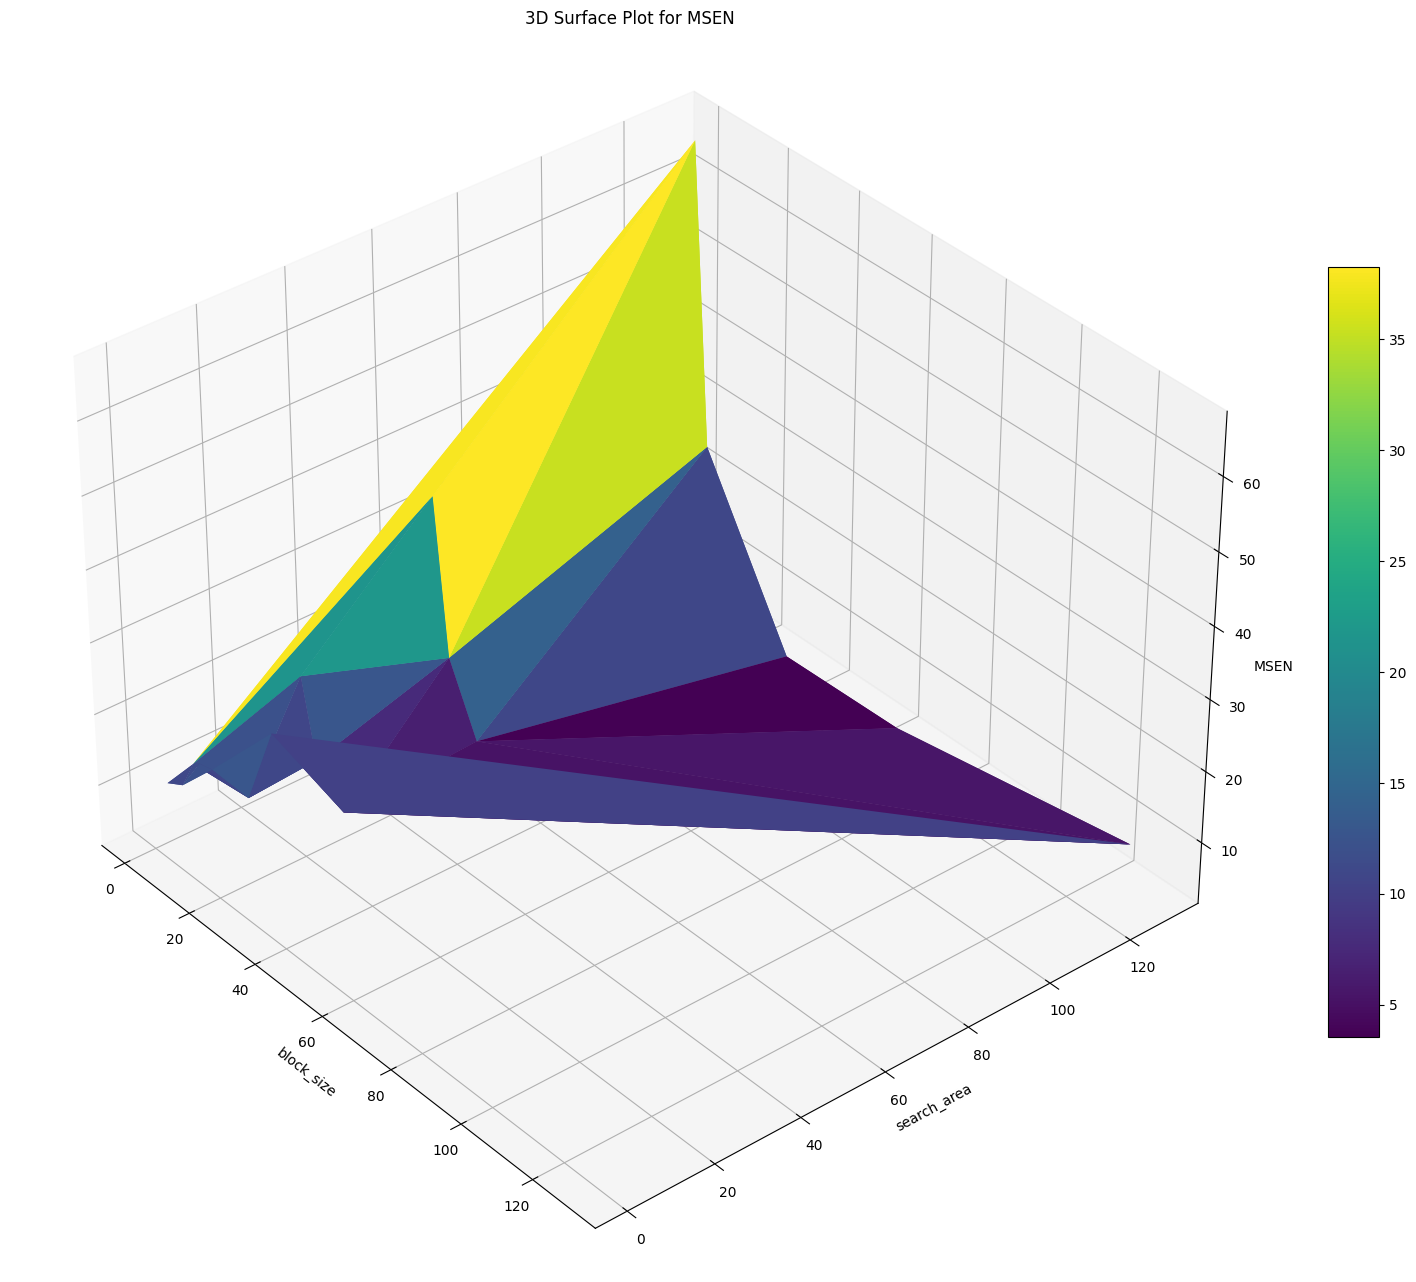

[11.80441987 13.09494978 34.57053692  6.69857114  4.79965525 18.07578456
  3.67455403  2.71096346 12.54297455 29.94295493 18.63509117  3.64686517
 17.87804143 10.32166137  7.92888739 14.28298502  7.41436198  6.46974515
  3.28393162 10.83529674 10.64870485 10.83571316 30.07117251 11.41635222
 18.2612337  10.29121102 67.16782423  9.24576572 25.83882919  6.37444941
 10.64523298 13.0112524   8.08418298]
2.7109634637094566


In [84]:
# plot a 3d surface plot for the MSEN and the parameters block_size, search_area. Make it interactive with plotly


fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')


ax.plot_trisurf(df3['block_size'], df3['search_area'], df3['MSEN'], cmap='viridis', linewidth=0.2)
ax.set_xlabel('block_size')
ax.set_ylabel('search_area')
ax.set_zlabel('MSEN')


# add a color bar which maps values to colors.
fig.colorbar(ax.plot_trisurf(df3['block_size'], df3['search_area'], df3['MSEN'], cmap='viridis', linewidth=0.2), shrink=0.5, aspect=15)
# Manually set the camera perspective
ax.view_init(elev=35, azim=320)  # Set the elevation and azimuth angles

plt.title('3D Surface Plot for MSEN')
plt.show()


# print all msen values
print(df3['MSEN'].values)

# print the best msen value
print(df3['MSEN'].min())


In [58]:
# 3D interacitve plot with plotly
fig = px.scatter_3d(df3, x='block_size', y='search_area', z='MSEN',
                color='MSEN', opacity=0.7)
# set the points smaller
fig.update_traces(marker=dict(size=4))
fig.show()




In [23]:
df3


,block_size,search_area,step_size,distance_type,MSEN,MSEN_value
0,2,8,2,0,11.804420,11.804420
4,8,8,4,50,13.094950,13.094950
8,4,64,2,100,34.570537,34.570537
9,8,16,4,100,6.698571,6.698571
10,16,16,16,100,4.799655,4.799655
11,4,32,4,100,18.075785,18.075785
12,16,64,8,100,3.674554,3.674554
14,16,32,8,100,2.710963,2.710963
15,4,8,4,50,12.542975,12.542975
17,16,32,16,50,29.942955,29.942955
